## <img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Nombre y Apellido

***
## Estimación espectral


In [11]:
## Inicialización del Notebook del TP3

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML

fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
from scipy import signal
import scipy.fft as f

def generador_senoidal (fs=4, f0=1, N=1000, a0=1, p0=0, dc=0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """    

    # comienzo de la función
    Ts=1/fs  #tiempo de muestreo
    
   
     #grilla eje temporal

    tt=np.linspace(0, (N-1), N).flatten()
    
    signal=dc + a0*np.sin(2*np.pi*tt*f0*Ts + p0).flatten()

    
    
    # fin de la función
    
    return tt, signal

<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

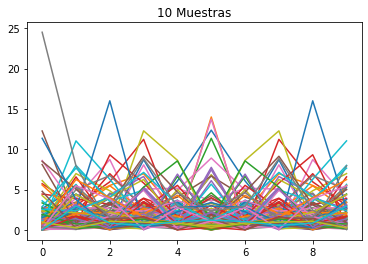

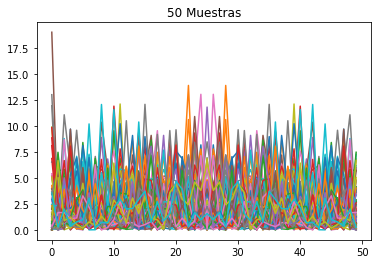

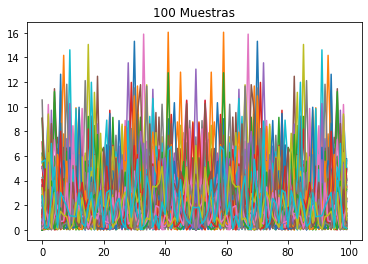

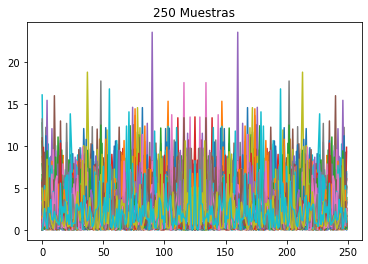

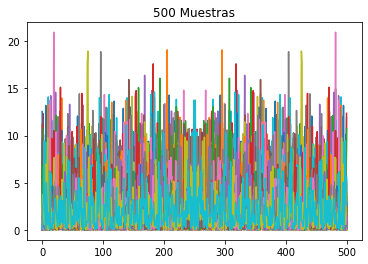

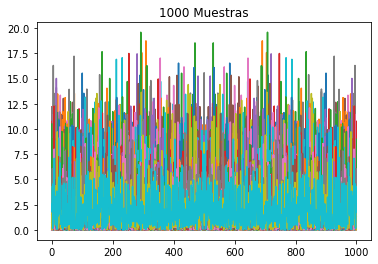

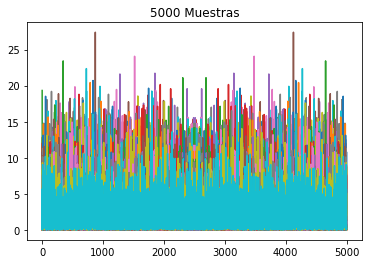

In [14]:
# Simular para los siguientes tamaños de señal
#N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
#Asumimos ergodicidad , realizo 100 realizaciones.

FS=1000

f1=FS/5

N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=np.int)

a1=2

media=0
var=2
m=100

aux=np.array([])
aud=np.array([])
varh=[]
medh=[]
medv=[]
for r in N:
    
    
    x=np.random.normal(media,np.sqrt(var),(r,m)).flatten()
    aux=np.hstack((aux,x))
    
  
Naux=N*m  #columnas constantes m y filas variables segun N
Varh2=[]

for r in Naux:
    a=r//m    #Calculo las filas
    xa=aux[0:r].reshape(a,m)
    Px=((np.abs(f.fft(xa,a,axis=0)))**2)/a#r  
    h=np.sum(np.mean(Px,axis=0))/m #calculo estimador media
    medh.append(h)                 #adjunto media para cada iteracion de N 

    vh=np.sum(np.var(Px,axis=0))/m
#    Vh2=np.sum((np.mean(Px,axis=0)-h)**2)/m 
#    Varh2.append(Vh2)                
    varh.append(vh)   #vUsar esta varianza
    s=str(a)+' Muestras'
    plt.figure()
    plt.title(s)
    plt.plot(Px)

#xdft=d.DFT(w1,1000

#Calculo sesgo
Medh=np.asfarray(medh)# convierto la lista en np.array de float
A0=0
Seg=A0-Medh

In [15]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_per = [ 
                   [Seg[0], varh[0]], # <-- acá debería haber numeritos :)
                   [Seg[1], varh[1]], # <-- acá debería haber numeritos :)
                   [Seg[2], varh[2]], # <-- acá debería haber numeritos :)
                   [Seg[3], varh[3]], # <-- acá debería haber numeritos :)
                   [Seg[4], varh[4]], # <-- acá debería haber numeritos :)
                   [Seg[5], varh[5]], # <-- acá debería haber numeritos :)
                   [Seg[6], varh[6]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados_per, columns=['$s_P$', '$v_P$'],
               index=N)
HTML(df.to_html())


,$s_P$,$v_P$
10,-2.167630,4.739848
50,-2.008532,4.027280
100,-2.003882,3.930975
250,-2.000738,4.032601
500,-1.995429,3.995671
1000,-1.999805,3.899388
5000,-2.000639,4.006702


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

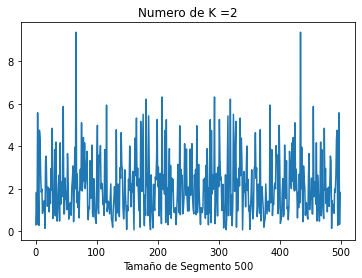

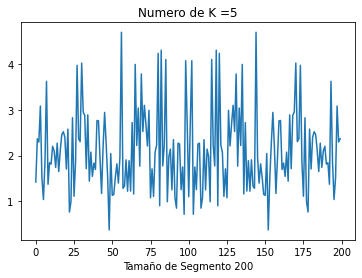

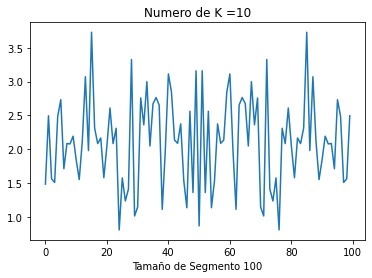

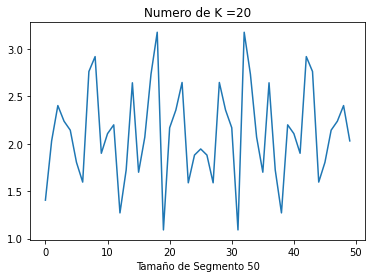

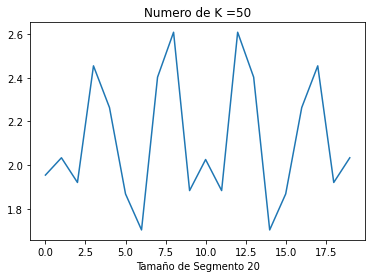

In [5]:
# Simular para los siguientes tamaños de señal
N = 1000
K = np.array([2, 5, 10, 20, 50], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################

N = 1000
K = np.array([2, 5, 10, 20, 50], dtype=np.int)
VarB=[]
Sesb=[]

x2=np.random.normal(media,np.sqrt(var),N)#media=0

for D in K:
    l=N//D

    c=np.arange(0,D)
    Pa=0
    for r in c:
        ax=r*l
        bx=ax+l
        Pxi=((np.abs(f.fft(x2[ax:bx],l,axis=0)))**2)/l
        Pa=Pa+Pxi
        # print(r)
    P=Pa/D
    titulo= "Numero de K =" + str(D)
    Segmento=str(l)
    plt.figure()
    plt.title(titulo)
    plt.plot(P)
    plt.xlabel("Tamaño de Segmento " + Segmento)
    pm=np.mean(P)#Calculo el valor esperado del estimador del periodograma de barlett
    s=media-pm   
    Sesb.append(s)
    Vm=np.var(P)
    VarB.append(Vm)
      #  Hb.append(hb)



In [6]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados_bartlett = [ 
                   [Sesb[0], VarB[0]], # <-- acá debería haber numeritos :)
                   [Sesb[1], VarB[1]], # <-- acá debería haber numeritos :)
                   [Sesb[2], VarB[2]], # <-- acá debería haber numeritos :)
                   [Sesb[3], VarB[3]], # <-- acá debería haber numeritos :)
                   [Sesb[4], VarB[4]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados_bartlett, columns=['$s_B$', '$v_B$'],
               index=K)
HTML(df.to_html())


,$s_B$,$v_B$
2,-2.112585,2.120511
5,-2.112585,0.811002
10,-2.112585,0.440420
20,-2.112585,0.256408
50,-2.112585,0.081021


<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

In [7]:
# Simular para los siguientes tamaños de señal
N = 1000
#slp = 50 # por ciento de ventanas adyacentes
#K = np.array([2, 5, 10, 20, 50], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
K = np.array([2, 5, 10, 20, 50], dtype=np.int)
VarW=[]
SesW=[]

x3=np.random.normal(media,np.sqrt(var),N)#media=0

for d in K:
    L=N//d  #Calculo largo de los segmentos
    
    f, Pxx_den = signal.welch(x3, fs=1000.0, nperseg=L,axis=0)
    
    pmw=np.mean(Pxx_den)#Calculo el valor esperado del estimador del
    sw=media-pmw        
    SesW.append(sw)
    Vmw=np.var(Pxx_den)
    VarW.append(Vmw)

In [8]:

#######################################
# Tu simulación que genere resultados #
#######################################
tus_resultados_Welch = [ 
                   [SesW[0], VarW[0]], # <-- acá debería haber numeritos :)
                   [SesW[1], VarW[1]], # <-- acá debería haber numeritos :)
                   [SesW[2], VarW[2]], # <-- acá debería haber numeritos :)
                   [SesW[3], VarW[3]], # <-- acá debería haber numeritos :)
                   [SesW[4], VarW[4]], # <-- acá debería haber numeritos :)
                 ]

df = DataFrame(tus_resultados_Welch, columns=['$s_B$', '$v_B$'],
               index=K)
HTML(df.to_html())


,$s_B$,$v_B$
2,-0.003709,4.604986e-06
5,-0.003761,1.586132e-06
10,-0.003721,7.774535e-07
20,-0.003719,7.036606e-07
50,-0.003342,1.007527e-06


<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar el módulo de análisis espectral **Spectrum** donde encontrará la mayoría de los métodos descriptos en el Capítulo 8 del libro de Hayes.

</div>

0.6309573444801932
0.12589254117941673


Text(0, 0.5, 'Potencia [W] - DB')

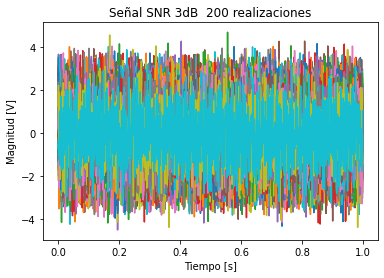

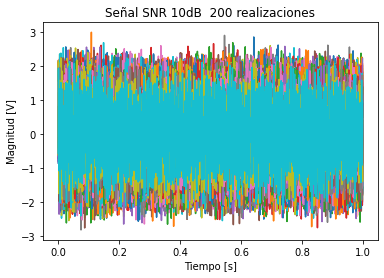

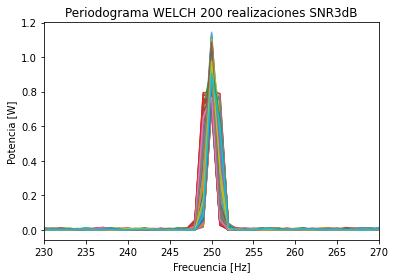

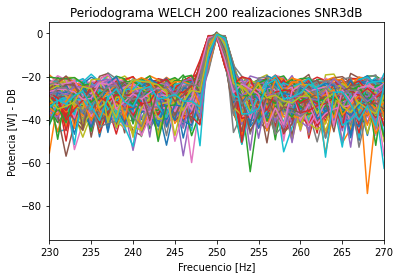

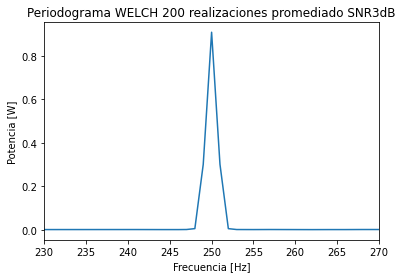

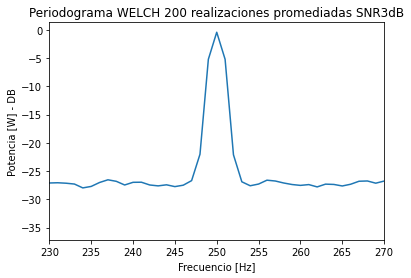

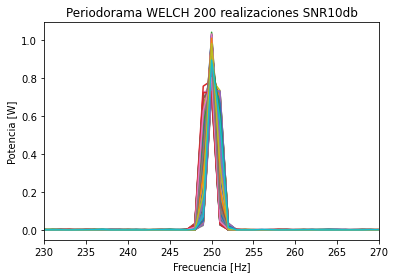

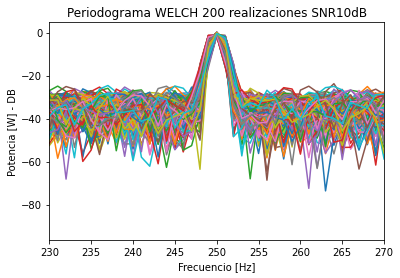

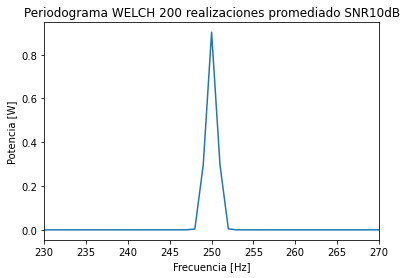

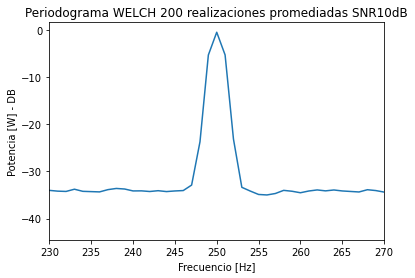

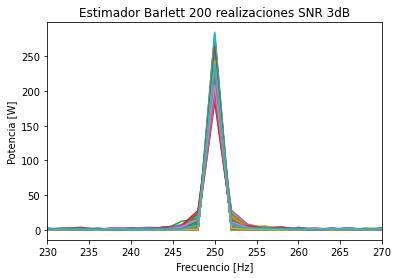

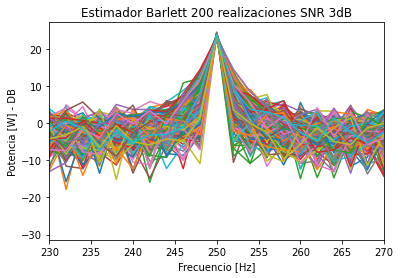

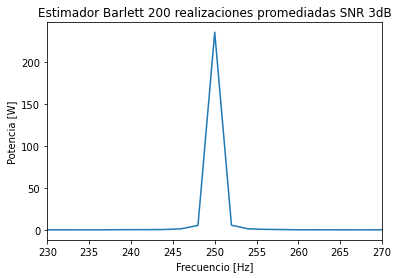

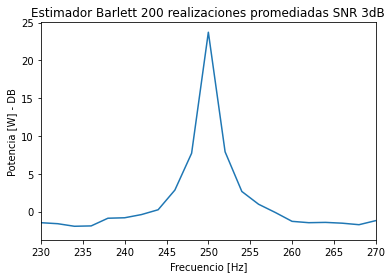

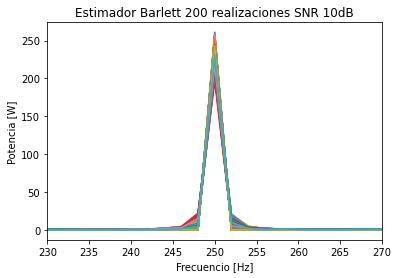

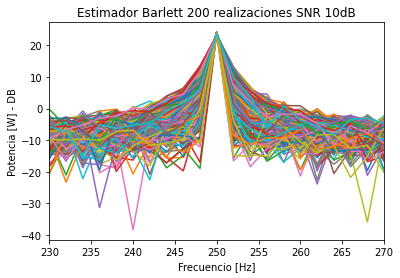

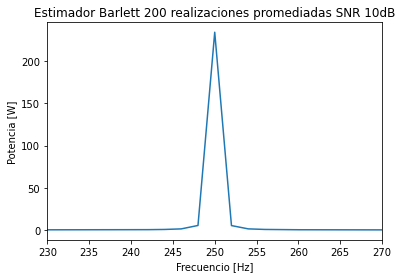

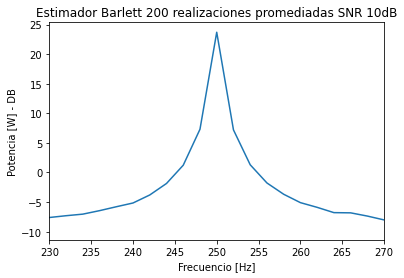

In [30]:
# Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
fs=1000.0
ts=1/fs
w0=fs/4
N=1000
rs=fs/N  
a1=np.sqrt(2) #amplitud para potencia unitaria
Gr=[]
SNR=np.array([3,10]) #DB
ruido=np.array([],dtype=np.float).reshape(1000,0)
for r in SNR:
    #SNRv=10**(r/10)    #SNRv en veces
    G=(10**(((a1**2)/2-r)/10)) #sigma al cuadrado
    print(G)
    Gr.append(G)
    
fr=np.random.default_rng().uniform(-0.5,0.5,200)

Sr3=np.array([],dtype=np.float64).reshape(1000,0)
Sr10=np.array([],dtype=np.float64).reshape(1000,0)

w1=w0+fr*rs

for r in w1:
    
    x,y3 = generador_senoidal (fs=fs, f0=r, N=1000, a0=a1, p0=0, dc=0)
    
    r3=np.random.normal(0,np.sqrt(Gr[0]),N)
    yr3= y3 + r3
    Sr3=np.hstack((Sr3, yr3[:,np.newaxis]))

plt.figure()
plt.plot(x*ts,Sr3)
plt.title("Señal SNR 3dB  200 realizaciones")
plt.ylabel("Magnitud [V]")
plt.xlabel("Tiempo [s]")    

for r in w1:
    
    x,y10 = generador_senoidal (fs=fs, f0=r, N=1000, a0=a1, p0=0, dc=0)
    r10=np.random.normal(0,np.sqrt(Gr[1]),N)
    yr10 = y10 + r10
    Sr10 =np.hstack((Sr10, yr10[:,np.newaxis])) 

       
plt.figure()
plt.plot(x*ts,Sr10)
plt.title("Señal SNR 10dB  200 realizaciones")
plt.ylabel("Magnitud [V]")
plt.xlabel("Tiempo [s]")

L=1000  
fden3, Pxx_den3 = signal.welch(Sr3, fs=1000.0, nperseg=L,axis=0,scaling='spectrum',average='mean')

#Calculo Varianza y esperanza

Ep3w=np.mean(Pxx_den3,axis=0)
Var3w=np.var(Pxx_den3,axis=0) 

plt.figure()
plt.plot(fden3,Pxx_den3)
plt.title("Periodograma WELCH 200 realizaciones SNR3dB")
plt.xlim(230,270)
plt.ylabel("Potencia [W]" )
plt.xlabel("Frecuencia [Hz]")  

plt.figure()
plt.title("Periodograma WELCH 200 realizaciones SNR3dB")
plt.plot(fden3,10*np.log10(Pxx_den3))
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W] - DB")
#Promediadio de las 200 realizaciones de SNR3dB

Pm3w=np.mean(Pxx_den3,axis=1)

plt.figure()
plt.plot(Pm3w)
plt.title("Periodograma WELCH 200 realizaciones promediado SNR3dB")
plt.xlim(230,270)
plt.ylabel("Potencia [W]")
plt.xlabel("Frecuencia [Hz]")
frec3=np.argmax(Pm3w)

plt.figure()
plt.title("Periodograma WELCH 200 realizaciones promediadas SNR3dB")
plt.plot(10*np.log10(Pm3w))
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W] - DB")

fden10, Pxx_den10 = signal.welch(Sr10, fs=1000.0, nperseg=L,axis=0,scaling='spectrum',average='mean')

#Calculo varianza y esperanza 

Ep10w=np.mean(Pxx_den10,axis=0)
Var10w=np.var(Pxx_den10,axis=0)

plt.figure()
plt.plot(fden10,Pxx_den10)
plt.title("Periodorama WELCH 200 realizaciones SNR10db")
plt.xlim(230,270)
plt.ylabel("Potencia [W]")
plt.xlabel("Frecuencia [Hz]")

plt.figure()
plt.title("Periodograma WELCH 200 realizaciones SNR10dB")
plt.plot(fden3,10*np.log10(Pxx_den10))
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W] - DB")
#Promediado de las  200 realizaciones de SNR10db

Pm10w=np.mean(Pxx_den10,axis=1)

plt.figure()
plt.plot(Pm10w)
plt.title("Periodograma WELCH 200 realizaciones promediado SNR10dB")
plt.xlim(230,270)
plt.ylabel("Potencia [W]")
plt.xlabel("Frecuencia [Hz]")
frec3=np.argmax(Pm10w)

plt.figure()
plt.title("Periodograma WELCH 200 realizaciones promediadas SNR10dB")
plt.plot(10*np.log10(Pm10w))
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W] - DB")


#plt.figure()
#plt.plot(Pm10)
#plt.xlabel("Frecuencia [Hz]")
#frec10=np.argmax(Pm10)



###################################
#                                 #
#       Estimador barlett         #
#                                 #
###################################
N = 1000
K = np.array([2], dtype=np.int) #numeros de secciones

Pb3=np.array([],dtype=np.float64).reshape(500,0)
Pb10=np.array([],dtype=np.float64).reshape(500,0)

for D in K:   
    l=N//D              #Calculo el tamaño de cada sección segun K 
    c=np.arange(0,D)    #Uso K como indice para contar los segmentos

    for h in np.arange(0,200):
        Pa3=0
        Pa10=0
        for r in c:
            ax=r*l
            bx=ax+l
            Pxi3=((np.abs(f.fft(Sr3[ax:bx,h],l,axis=0)))**2)/l
            Pxi10=((np.abs(f.fft(Sr10[ax:bx,h],l,axis=0)))**2)/l
            Pa3=Pa3+Pxi3
            Pa10=Pa10+Pxi10
        # print(r)
        P3=Pa3/2
        P10=Pa10/2
        Pb3=np.hstack((Pb3,P3[:,np.newaxis]))
        Pb10=np.hstack((Pb10,P10[:,np.newaxis]))

        rsl=fs/l  #resolución espectral  

#promediado realizaciones
        
Pm3=np.mean(Pb3,axis=1)
Pm10=np.mean(Pb10,axis=1)

#Calculos de esperanzas

Ep3b=np.mean(Pb3,axis=0)
Ep10b=np.mean(Pb10,axis=0)

#varianzas 
Vpb3=np.var(Pb3,axis=0)
Vpb10=np.var(Pb10,axis=0)
        
plt.figure()
plt.title("Estimador Barlett 200 realizaciones SNR 3dB")
plt.plot(rsl*np.arange(0,l),Pb3)
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W]")

plt.figure()
plt.title("Estimador Barlett 200 realizaciones SNR 3dB")
plt.plot(rsl*np.arange(0,l),10*np.log10(Pb3))
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W] - DB")

plt.figure()
plt.title("Estimador Barlett 200 realizaciones promediadas SNR 3dB")
plt.plot(rsl*np.arange(0,l),Pm3)
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W]")

plt.figure()
plt.title("Estimador Barlett 200 realizaciones promediadas SNR 3dB")
plt.plot(rsl*np.arange(0,l),10*np.log10(Pm3))
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W] - DB")

plt.figure()
plt.title("Estimador Barlett 200 realizaciones SNR 10dB")
plt.plot(rsl*np.arange(0,l),Pb10)
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W]")

plt.figure()
plt.title("Estimador Barlett 200 realizaciones SNR 10dB")
plt.plot(rsl*np.arange(0,l),10*np.log10(Pb10))
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W] - DB")
Pbar=np.array([],dtype=np.float64).reshape(1000,0)

plt.figure()
plt.title("Estimador Barlett 200 realizaciones promediadas SNR 10dB")
plt.plot(rsl*np.arange(0,l),Pm10)
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W]")

plt.figure()
plt.title("Estimador Barlett 200 realizaciones promediadas SNR 10dB")
plt.plot(rsl*np.arange(0,l),10*np.log10(Pm10))
plt.xlim(230,270)
plt.xlabel("Frecuencio [Hz]")
plt.ylabel("Potencia [W] - DB")

   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Elegi el estimador barlett por que tiene menos costo computacional para implementar y a medida que aumenta la cantidad de muestra N es un estimador consistente de la densidad espectral de potenecia y, además es asintóticamente insesgado y su variancia es inversamente proporcional a K (Var(P<sub>b</sub>)=P<sup>2</sup>(w)/K<sup>2</sup>).La desventaja es que la resolucion espectral es K veces mas ancha que la del periodograma.
Lo que hace el metodo de barlett es tomar un proceso X(n) de N muestras y dividirlo en segmentos K de L muestras y a cada segmento de L muestras le aplica el periodograma, luego los promedia a todos, es decir suma los k segmentos y los divide por K. Lo ideal seria tomar varios procesos incorrelados y promediarlos K veces, pero como no podemos asegurar que sean incorrelados entres si se toma un proceso bien largo y se procede cono se explica al principio      
</div>

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Hay un indicador M como figura de merito que es el producto entre la variabilidad del estimador (V) y la resolucion del estimador,es decir M=V*dw. Este indicador M debe ser lo mas pequeño posible. Y la variabilidad del esimador se calcula como: V=Var(Px)/E<sup>2</sup>(Px), (E<sup>2</sup>es la esperanza al cuadrado).
</div>

In [23]:

#######################################
# Tu simulación que genere resultados #
#######################################


#Calculo las esperanzas
#----------------------
#barlett

Eb3=np.sum(Ep3b)/Ep3b.size       #3db  
Eb10=np.sum(Ep10b)/Ep10b.size    #10db

#Welch
Ew3=np.sum(Ep3w)/Ep3w.size      #3db
Ew10=np.sum(Ep10w)/Ep10w.size   #10db
#Calculo varianza
#----------------
#barlett
Varb3=np.sum(Vpb3)/Vpb3.size
Varb10=np.sum(Vpb10)/Vpb10.size

#welch
Varw3=np.sum(Var3w)/Var3w.size
Varw10=np.sum(Var10w)/Var10w.size

#calculo variablilidad
#----------------------
#Barlett
Vb3=Varb3/(Eb3**2)
Vb10=Varb10/(Eb10**2)

#Welch
Vw3  = Varw3/(Ew3**2)
Vw10 = Varw10/(Ew10**2)


#La resolucion espectral minima la saque graficamente a -3dB de la Frecuencia 
#central

Dwb3=0.766
Dwb10=0.734

DWw3 =1.306  
DWw10=1.282


Mb3=Vb3*Dwb3
Mb10=Vb10*Dwb10

Mw3=Vw3*DWw3
Mw10=Vw10*DWw10
##########################################################
#                                                        # 
# NOTA: segun las Teoria el indicador de WELCH debe ser  #
# más chico, pero no pude equiparar las muestra para     #
# que sea comprobable el resultado por falta de tiempo   #
##########################################################


# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   [Mw3, Mb3], # <-- acá debería haber numeritos :)
                   [Mw10, Mb10] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$i_W$', '$i_B$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())


222.87732634996698
218.93193051319165


,$i_W$,$i_B$
3 dB,119.918706,63.849543
10 dB,243.051979,127.048232
